<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

# Decision Trees Classification

Importing the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
# first we look at target variable proportions:
pd.crosstab(df['Purchased'],df['Purchased'], normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


## Data preprocessing 

In [7]:
df.isna().sum()  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop('User ID',axis=1, inplace=True)

### Dealing with categorical variables:
In DTs models, we don't need to transfer the categorical variables into dummy variables. However, the algorithm cannot handle string names either. So we should number code the categorical variables. 

In [9]:
df['Gender'] = np.where(df['Gender']=='Male',1,0)

In [10]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
df = df[['Purchased','Age', 'EstimatedSalary', 'Gender']]

In [12]:
df.head()

,Purchased,Age,EstimatedSalary,Gender
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


## Data visualization 

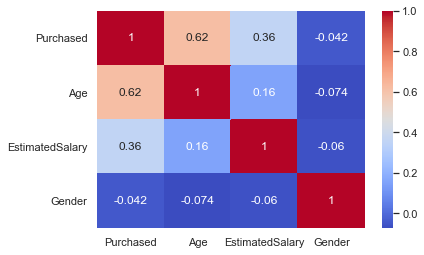

In [15]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

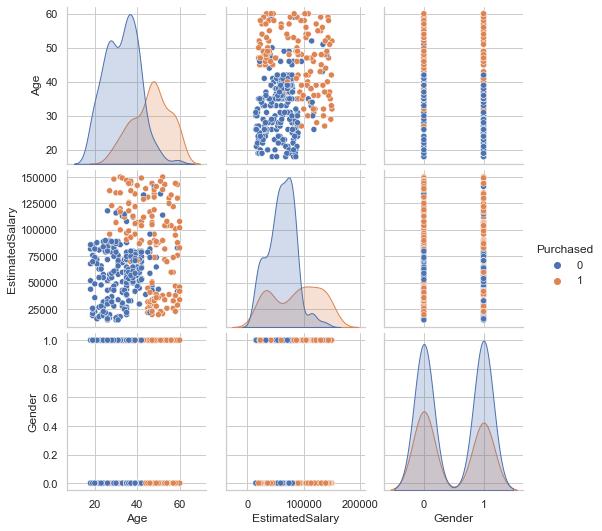

In [16]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'Purchased')
plt.show()

### Defining the variables and splitting the data

In [13]:
y = df['Purchased']
X = df.drop('Purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [14]:
X_train.head()

,Age,EstimatedSalary,Gender
269,40,61000,1
389,48,35000,0
232,40,107000,1
89,35,50000,1
236,40,57000,1


### Scaling the features: 


For tree based models, there is no need to scale the features! (No distance metrics is used)

###  DTs Classification with Sklearn

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
Tree_classifier = DecisionTreeClassifier()
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Predicting the Test set classes
y_hat       = Tree_classifier.predict(X_test)

### Decision Tree Parameters

The following table lists key parameters available for this purpose in the sklearn decision tree implementation. After introducing the most important parameters, we will illustrate how to use cross-validation to optimize the hyperparameter settings with respect to the bias-variance tradeoff and lower prediction errors:

| Parameter                | Default | Options                                                                                                                                                               | Description                                                                                                                                                                                                             |
|--------------------------|---------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| criterion                | gini    | Regression: MSE, MAE Classification: Gini impurity, Cross Entropy                                                                                                     | Metric to evaluate split quality.                                                                                                                                                                                       |
| splitter                 | best    | best, random                                                                                                                                                          | How to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.                                                                            |
| max_depth                | None    | int                                                                                                                                                                   | Max # of levels in tree. Split nodes until max_depth is reached or all leaves are pure or all leaves contain less than min_samples_split samples.                                                                       |
| max_features             | None    | None: max_features=n_features; int; float (fraction): int(max_features * n_features)  auto, sqrt: max_features=sqrt(n_features). log2: max_features=log2(n_features). | # of features to consider when evaluating split                                                                                                                                                                         |
| max_leaf_nodes           | None    | None: unlimited # of leaf nodes int                                                                                                                                   | Continue to split nodes that reduce relative impurity the most until reaching max_leaf_nodes.                                                                                                                           |
| min_impurity_decrease    | 0       | float                                                                                                                                                                 | Split node if impurity decreases by at least this value.                                                                                                                                                                |
| min_samples_leaf         | 1       | int; float (as percentage of N)                                                                                                                                       | Minimum # of samples to be at a leaf node. A split will only be considered if there are at least min_samples_leaf training samples in each of the left and right branches. May smoothen the model, esp. for regression. |
| min_samples_split        | 2       | int; float (as percentage of N)                                                                                                                                       | The minimum number of samples required to split an internal node:                                                                                                                                                       |
| min_weight_fraction_leaf | 0       | NA                                                                                                                                                                    | The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided (in fit method).                       |
| class_weight             | None    | balanced: inversely proportional to class frequencies dict: {class_label: weight} list of dicts (for multi-output)                                                    | Weights associated with classes                                                                                                                                                                                         |

----

## Performance metrics:

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [20]:
print(confusion_matrix(y_test, y_hat))

[[44  4]
 [13 19]]


#### Built-in classification report

In [21]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        48
           1       0.83      0.59      0.69        32

    accuracy                           0.79        80
   macro avg       0.80      0.76      0.76        80
weighted avg       0.79      0.79      0.78        80



---

## Pruning the tree using cost complexity pruning method. 
### Choosing $\alpha$ with cross validation. 

In [22]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train,y_train)

In [23]:
path

{'ccp_alphas': array([0.        , 0.0015625 , 0.0020202 , 0.00203488, 0.00243056,
        0.0025    , 0.0025    , 0.00265625, 0.00273437, 0.00277778,
        0.00284091, 0.003125  , 0.00318723, 0.00357143, 0.00381731,
        0.00511297, 0.00775811, 0.008125  , 0.12078047, 0.18094607]),
 'impurities': array([0.003125  , 0.0046875 , 0.01074811, 0.01685276, 0.02657498,
        0.03157498, 0.03907498, 0.04438748, 0.04985623, 0.05541179,
        0.0610936 , 0.0673436 , 0.08327975, 0.09399404, 0.10162865,
        0.11185459, 0.13512893, 0.15137893, 0.27215939, 0.45310547])}

In [24]:
ccp_alphas = path.ccp_alphas

In [26]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
#sorted(sklearn.metrics.SCORERS.keys())

In [27]:
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.871875
1,0.001562,0.862500
2,0.002020,0.865625
3,0.002035,0.868750
4,0.002431,0.871875


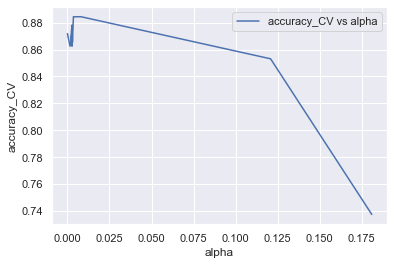

In [28]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [29]:
np.argmax(output['accuracy_CV'])

13

In [30]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.003571
accuracy_CV    0.884375
Name: 13, dtype: float64

So the maximum accuracy is 89%.

In [31]:
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.0035714285714285713

Refit the DTs classifier with optimal alpha!

In [32]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

#### Confusion matrix

In [33]:
print(confusion_matrix(y_test, y_hat_opt))

[[44  4]
 [ 8 24]]


#### Built-in classification report

In [34]:
print(classification_report(y_test, y_hat_opt))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        48
           1       0.86      0.75      0.80        32

    accuracy                           0.85        80
   macro avg       0.85      0.83      0.84        80
weighted avg       0.85      0.85      0.85        80



###  Cross validation

Now let's try to get an estimate for the accuracy of our model using cross validation technique. 

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
# remember we saved our model in an object called "Tree_classifier"
accuracy = cross_val_score(estimator = optimal_DT, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [37]:
accuracy

array([0.875   , 0.890625, 0.84375 , 0.90625 , 0.875   ])

In [38]:
round(accuracy.mean(),3)

0.878

## Visualizing the Tree
4 different ways of visualizing a tree in Python: https://mljar.com/blog/visualize-decision-tree/

Plot DT with **plot_tree** method from sklearn. 

Let's visualize one simple tree with two features only. 


In [39]:
df.columns

Index(['Purchased', 'Age', 'EstimatedSalary', 'Gender'], dtype='object')

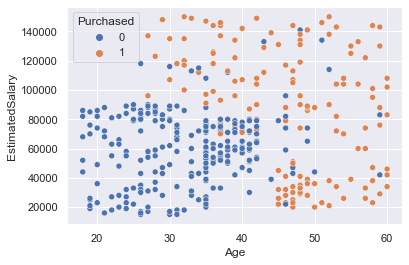

In [40]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')
plt.show()

In [48]:
dtree= DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

In [49]:
from sklearn.tree import plot_tree

In [50]:
X_train.shape

(320, 3)

In [51]:
X_train.head()

,Age,EstimatedSalary,Gender
269,40,61000,1
389,48,35000,0
232,40,107000,1
89,35,50000,1
236,40,57000,1


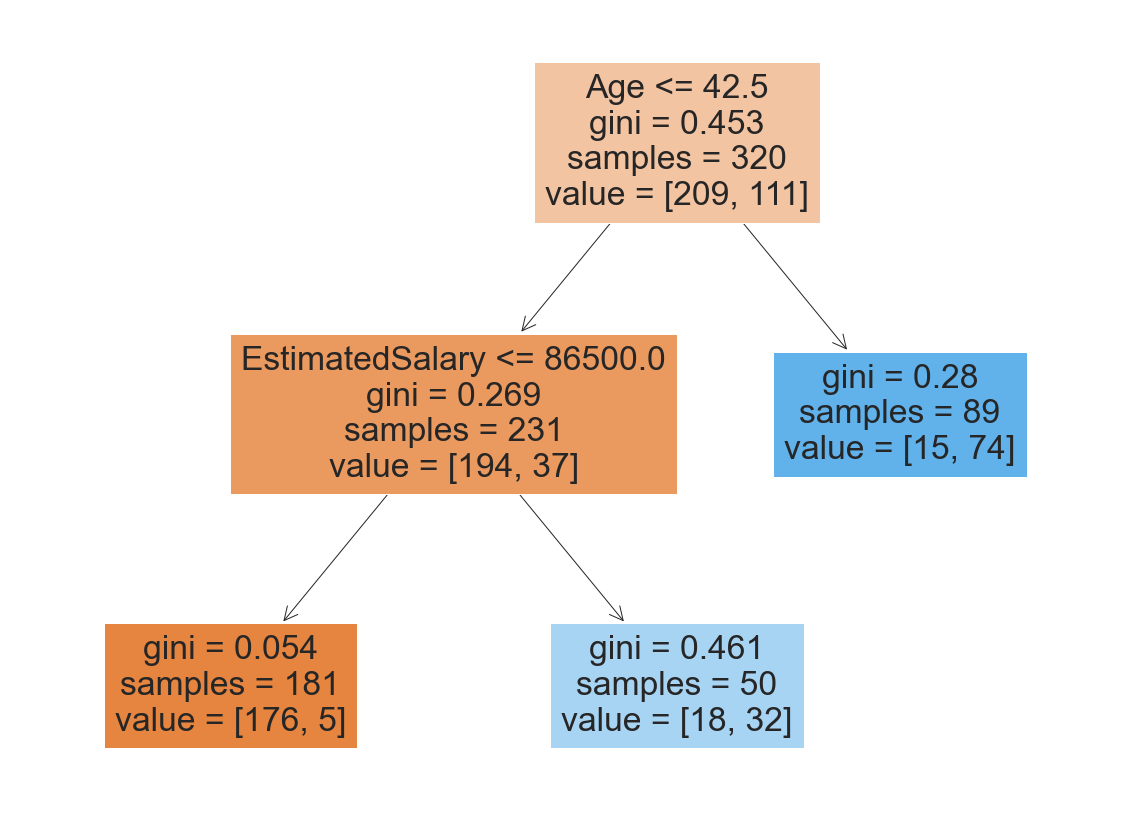

In [52]:
fig = plt.figure(figsize=(20,15))
DT_plot = plot_tree(dtree, feature_names=X_train.columns, filled=True)
# left branch True

In [47]:
fig.savefig("DT_plot_classification.png")

**Exercise**: 
Now try the optimal alpha and answer the following questions:
1. What is the level?
2. What is |T|?
3. How do you make sure that each terminal node has at least 50 boservations?

---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [53]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [54]:
# Feature Scaling: only for visualization purposes we need to scale the features. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

### Fitting Decision Tree classifier to the Training set

In [60]:
dtree = DecisionTreeClassifier(max_depth=100)
dtree.fit(X_train, y_train.values.reshape(-1,))
y_hat_vis = dtree.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


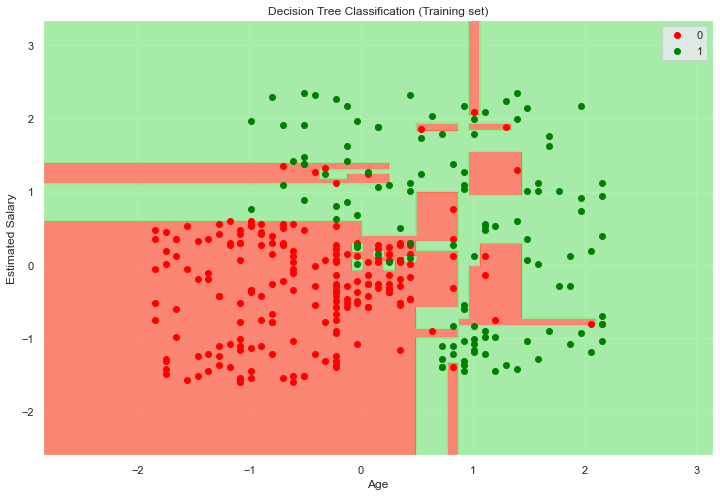

In [61]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Exercise**
1. If you use max_depth=100, what is the accuracy in the training set? 



### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


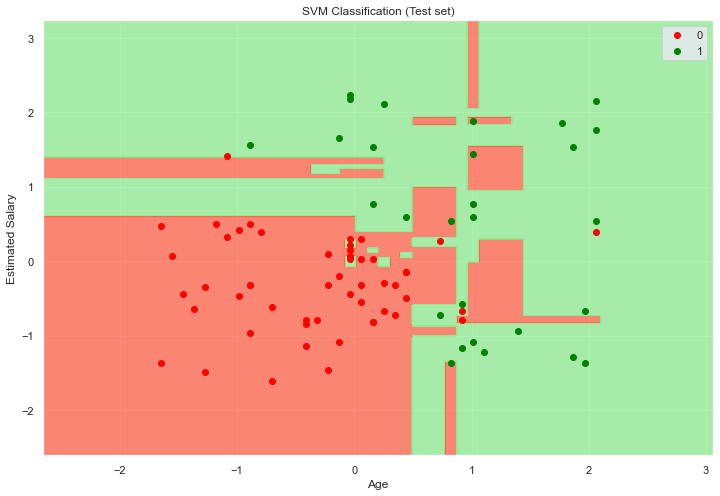

In [62]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [82]:
print(confusion_matrix(y_test, y_hat_vis))

[[47  5]
 [ 1 27]]


---

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Decision Trees visualization: https://mljar.com/blog/visualize-decision-tree/
